In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data=pd.read_csv("Fraud_check.csv")

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.shape

(600, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


# encoding the values

In [7]:
#We will create numerical variable for categorical data
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad']) 
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status']) 
data['Urban']= label_encoder.fit_transform(data['Urban'])

In [8]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [9]:
#We will take high income above 30000 
data["Taxable.Income"]=(data["Taxable.Income"]>30000)*1

In [10]:
x=data.drop(axis=0,columns="Taxable.Income")
y=data["Taxable.Income"]

In [11]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3)

# Building Decision Tree Classifier using Entropy Criteria

In [12]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

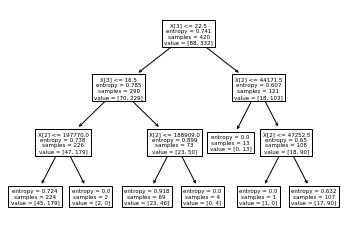

In [13]:
#PLot the decision tree
tree.plot_tree(model);

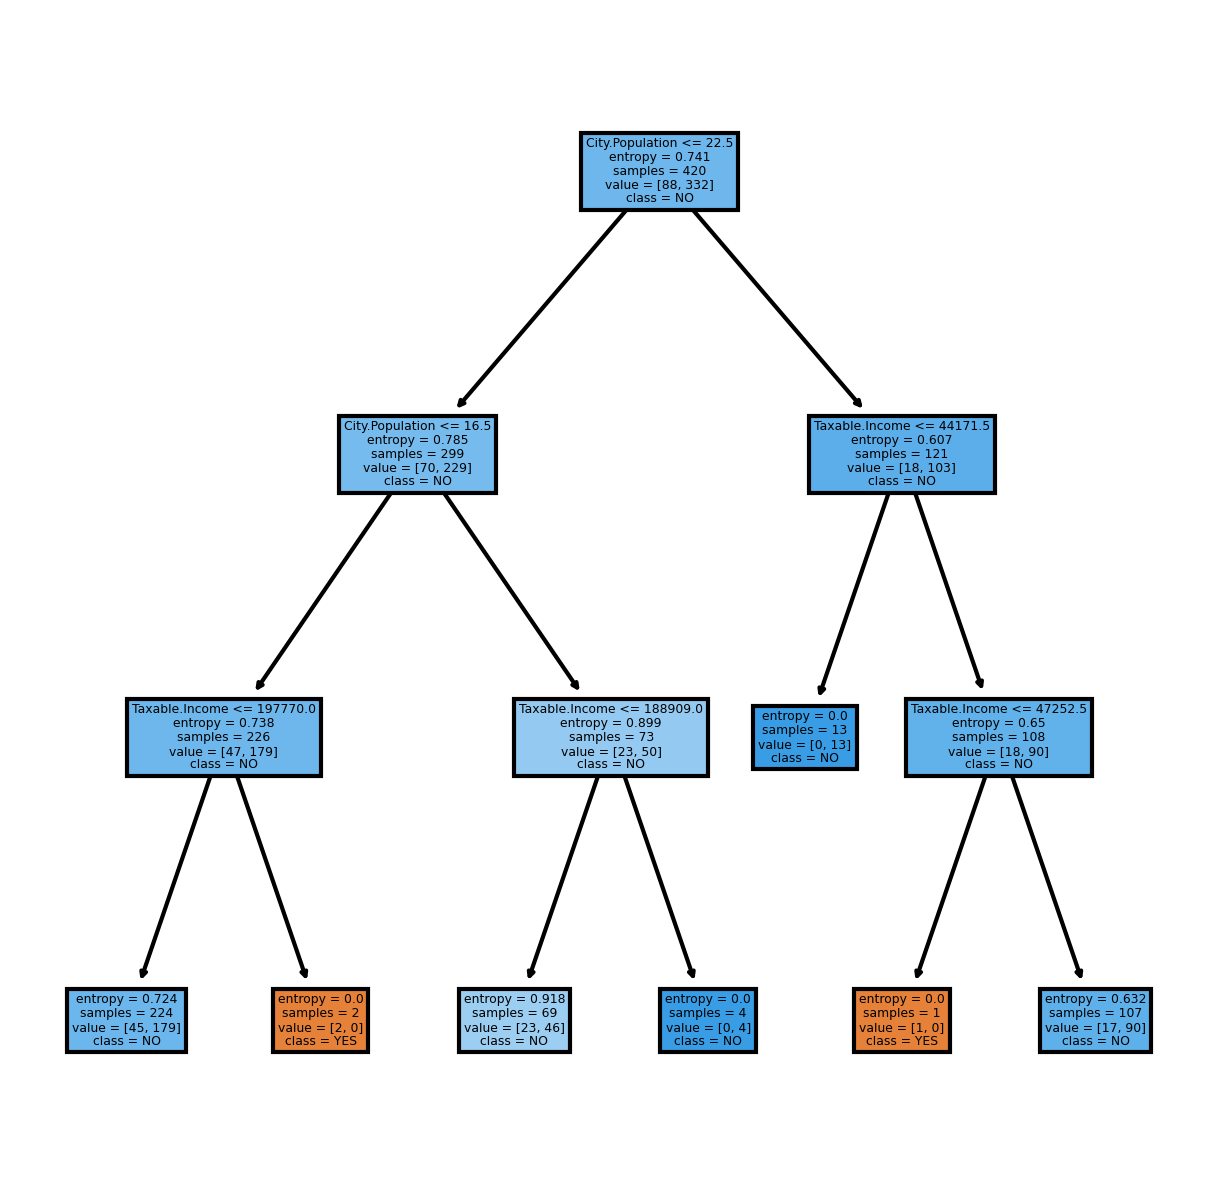

In [14]:
fn=["Undergrad","Marital.Status","Taxable.Income","City.Population","Work.Experience"]
cn=['YES','NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [15]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.7976190476190477

In [16]:
model.score(x_test, y_test)

0.7888888888888889

In [17]:
y_pred = model.predict(x_test)

In [18]:
#Here first column is for 'Good', & second is for 'Risky'
model.predict_proba(x_test)

array([[0.20089286, 0.79910714],
       [0.20089286, 0.79910714],
       [0.20089286, 0.79910714],
       [0.20089286, 0.79910714],
       [0.20089286, 0.79910714],
       [0.20089286, 0.79910714],
       [0.20089286, 0.79910714],
       [0.1588785 , 0.8411215 ],
       [0.1588785 , 0.8411215 ],
       [0.        , 1.        ],
       [0.20089286, 0.79910714],
       [0.20089286, 0.79910714],
       [0.20089286, 0.79910714],
       [0.20089286, 0.79910714],
       [0.20089286, 0.79910714],
       [0.33333333, 0.66666667],
       [0.20089286, 0.79910714],
       [0.1588785 , 0.8411215 ],
       [0.20089286, 0.79910714],
       [0.1588785 , 0.8411215 ],
       [0.20089286, 0.79910714],
       [0.20089286, 0.79910714],
       [0.20089286, 0.79910714],
       [0.20089286, 0.79910714],
       [0.20089286, 0.79910714],
       [0.1588785 , 0.8411215 ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.20089286, 0.79910714],
       [0.        , 1.        ],
       [0.

In [19]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    176
0      4
dtype: int64

In [20]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Taxable.Income,,
0,1,35
1,3,141


In [21]:
# confusion matrix

from sklearn.metrics import confusion_matrix, classification_report
cm= confusion_matrix(y_test, y_pred) 
cm

array([[  1,  35],
       [  3, 141]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.7888888888888889')

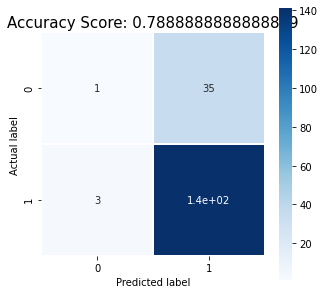

In [22]:
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

# Building Decision Tree Classifier (CART) using Gini Criteria

In [23]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [24]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [26]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(preds==y_test)

0.7888888888888889

# Decision Tree Regression

In [27]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [28]:
X=data.drop(axis=0,columns="Taxable.Income")
y=data["Taxable.Income"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [30]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [31]:
#Find the accuracy
model.score(X_test,y_test)

-1.1617088607594939

# CONCLUSION¶
## from entrophy and gini criteria we get same accuracy score 
# from decision tree for fraud dataset City population and taxable income as root node and major factor for risky and good
